# Select the Best Crops 



Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  


In [48]:
from itertools import combinations

In [49]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here
crops = pd.read_csv("soil_measures.csv")

# Check the number of crop categories
num_crops = crops['crop'].nunique()
print(f"Number of crop categories: {num_crops}")


Number of crop categories: 22


In [50]:
display(crops.head()), crops.info()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


(None, None)

In [51]:
# Check for missing values
missing_values = crops.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

# Check if all potential feature columns are numeric
numeric_check = crops.drop('crop', axis=1).apply(pd.to_numeric, errors='coerce').isnull().sum()
print("Non-numeric values in potential feature columns:")
print(numeric_check)


Missing values in the dataset:
N       0
P       0
K       0
ph      0
crop    0
dtype: int64
Non-numeric values in potential feature columns:
N     0
P     0
K     0
ph    0
dtype: int64


In [52]:
# Split the data into training and test sets
X = crops.drop('crop', axis=1)
y = crops['crop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape,y_train.shape,X_test.shape

((1760, 4), (1760,), (440, 4))

In [53]:
X

,N,P,K,ph
0,90,42,43,6.502985
1,85,58,41,7.038096
2,60,55,44,7.840207
3,74,35,40,6.980401
4,78,42,42,7.628473
...,...,...,...,...
2195,107,34,32,6.780064
2196,99,15,27,6.086922
2197,118,33,30,6.362608
2198,117,32,34,6.758793


In [54]:
for feature in ["N", "P", "K", "ph"]:
    log_reg = LogisticRegression(
        max_iter=2000,
        multi_class="multinomial",
    )
    log_reg.fit(X_train[[feature]], y_train)
    y_pred = log_reg.predict(X_test[[feature]])
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"F1-score for {feature}: {f1}")

F1-score for N: 0.10507916708090527
F1-score for P: 0.10457380486654515
F1-score for K: 0.2007873036107074
F1-score for ph: 0.04532731061152114


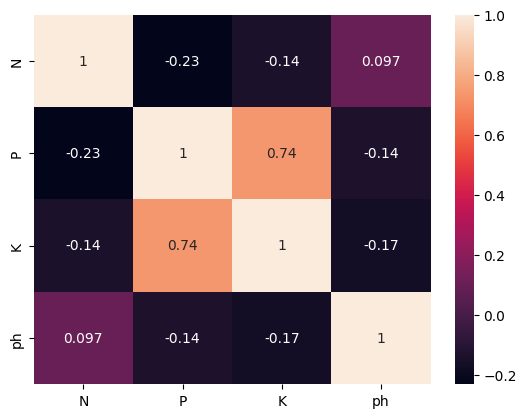

In [55]:
# Calculate the correlation matrix
crops_corr = crops[["N", "P", "K", "ph"]].corr()

# Create a heatmap using seaborn
sns.heatmap(crops_corr, annot=True)
plt.show()


P has the lowest corr. So final features are: N,K and pH

In [56]:
# Select the final features for the model
final_features = ["N", "K", "ph"]

# Split the data with the final features
X_train, X_test, y_train, y_test = train_test_split(
    crops[final_features],
    crops["crop"],
    test_size=0.2,
    random_state=42
)

# Train a new model and evaluate performance
log_reg = LogisticRegression(
    max_iter=2000, 
    multi_class="multinomial"
)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
model_performance = f1_score(y_test, y_pred, average="weighted")
print(model_performance)

0.558010495235685
